In [1]:
# notebook to obtain results for Figure 1 of https://arxiv.org/pdf/2508.05390

In [2]:
import numpy as np

In [3]:
def construct_single_ucc_operators(reference):
    """
    Function to return a list of reference-state-specific occupied-to-virtual single excitations conserving azimuthal spin.

    Each UCC excitation consists of an “excitation - de-excitation” (a_p^ a_q  -  a_q^ a_p), where p is virtual and q is occupied. 
    
    In InQuanto, these excitations are represented by FermionOperator object, see https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.FermionOperator.
    """
    pass

def construct_double_ucc_operators(reference):
    """
    Function to return a list of occupied-to-virtual double excitations conserving azimuthal spin. 
    
    Each excitation is chemist ordered and consists of an “excitation” - “de-excitation”, a_p^ a_q a_r^ a_s  -  a_s^ a_r a_q^ a_p, 
    where p is virtual, q is occupied, r is virtual and s is occupied.
    
    In InQuanto, these excitations are represented by FermionOperator object, see https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.FermionOperator.
    """
    pass

def apply_operator_to_ket(excitation, reference)
    """
    Function to return a new occupation state obtained by applying the excitation operator to a reference occupation state. 

    The returned occupation state should be should be in a representation compatible with the MultiConfigurationAnsatz and MultiConfigurationAnsatzSparse classes. 

    e.g. if excitation is a pair doubles applied to a reference represented by 1100, function should return 0011. 
    """
    pass


class MultiConfigurationAnsatzSparse():
    """ 
    Class to build an ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a list of occupation number (ON) configurations.

    This is the SSP method, based on Gleinig and Hoefler’s 2021 IEEE paper https://ieeexplore.ieee.org/document/9586240.

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationAnsatzSparse.
    
    Should have a method like circuit_resources to return circuit resource estimates.
     - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.circuit_resources
    """
    def __init__(list_of_occupation_configurations):
        pass
    
    def circuit_resources():
        pass
    
    pass


class MultiConfigurationAnsatz():
    """ 
    Class to build an ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a list of occupation number (ON) configurations.

    This is the GR method, using externally controlled Given's rotations. 

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationAnsatz.
    
    Should have a method like circuit_resources to return circuit resource estimates.
     - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.circuit_resources
    """
    def __init__(list_of_occupation_configurations):
        pass
    
    def circuit_resources():
        pass
    
    pass


class FermionSpaceAnsatzUCCSD(reference):
    """ 
    Class to build Unitary coupled cluster with singles and doubles excitations (UCCSD), instantiated from a reference which specifies spin orbital occupations.
    
    Should have a method like circuit_resources to return circuit resource estimates.
     - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.circuit_resources
     
    """ 
    def __init__(reference):
        pass
    
    def circuit_resources():
        pass
    
    pass


In [4]:
"""
For a given number of spin orbitals (nso), generate a UCCSD ansatz. For more details, see https://docs.quantinuum.com/inquanto/manual/ansatze/ucc_family.html.

Then, based on the excitation operators exponentiated in the UCCSD unitary, 
generate the individual occupation configurations by applying each excitation operator individually to the Hartree-Fock configuration.
This results in a set of occupation configurations. 

Then generate the multiconfiguration circuit that linear combines the configurations in this set
(where expansion coefficients are symbolic, corresponding to symbolic gate angles - which could be optimized by e.g. VQE). 

Use the GR and SSP methods to each generate a multiconfiguration circuit - compare their circuit resources.
In InQuanto, multiconfiguration circuits for symbolic gate angles are generated using the 
MultiConfigurationAnsatz class for the GR method (MultiConfigurationAnsatzSparse for the SSP method). 
For more details on ansatzes in InQuanto, see https://docs.quantinuum.com/inquanto/manual/ansatzae_overview.html.

Circuit resources are obtained using the circuit_resources() method of the ansatz class. 
This method decomposes UCCSD unitaries into tket's PauliExpBox (see https://docs.quantinuum.com/tket/user-guide/manual/manual_circuit.html#pauli-exponential-boxes),
and decomposes multi-contolled gates (used in GR and SSP methods) into 2 qubit (CNOTs) and Pauli rotations, compatible with gate set of qiskit's AerBackend. 

Repeat this for a range of nso, each given a closed shell Hartree-Fock configuration. 

Collect circuit resources for each nso (also equal number of qubits), 
and plot with respect to number of configurations and number of qubits. 

"""

n_configs_vs_so = []
ucc_depths = []
ucc_ngates = []
ucc_n2qgates = []
ssp_depths = []
ssp_ngates = []
ssp_n2qgates = []
gr_depths = []
gr_ngates = []
gr_n2qgates = []
for nso in range(4,17,2):
    flist = [1 for i in range(nso) if i+1 < ((nso/2) + 1)]
    for i in range(nso//2):
        flist.append(0)
    if sum(flist) % 2 != 0:
        flist[nso//2 - 1] = 0
    print("\n", flist)
    print(f"now doing {sum(flist)} electrons in {len(flist)} spin orbitals")
    ucc_ansatz = FermionSpaceAnsatzUCCSD(flist)
    ucc_circ_resources = ucc_ansatz.circuit_resources()
    print("UCCSD circuit:")
    print(ucc_circ_resources)

    # these are the excitation operators that will be exponentiated to generate the UCCSD unitary.
    ucc_singles = construct_single_ucc_operators(fstate)
    ucc_doubles = construct_double_ucc_operators(fstate)
    print(f"there are {len(ucc_singles + ucc_doubles)} UCCSD excitations here.")
    
    qss_ref = fstate.qubit_encode().terms[0]
    qss_list = [qss_ref]

    # apply each excitation operator to the Hartree-Fock occupation configuration
    for fop_tuple in ucc_singles:
        qss = apply_operator_to_ket(fop_tuple, flist)
        qss_list.append(qss)
    for fop_tuple in ucc_doubles:
        qss = apply_operator_to_ket(fop_tuple, flist)
        qss_list.append(qss)


    print(f"Applying {len(ucc_singles + ucc_doubles)} operators to the HF state generates {len(qss_list)} configurations.")

    
    ssp_ansatz = MultiConfigurationAnsatzSparse(qss_list)
    ssp_circ_resources = ssp_ansatz.circuit_resources()
    print("Circuit to prepare a state in a superpostion of these configurations (SSP):")
    print(ssp_circ_resources)
    
    if nso < 14:  # GR circuits so large that we do not consider nso>14 for GR method
        gr_ansatz = MultiConfigurationAnsatz(qss_list)
        gr_circ_resources = gr_ansatz.circuit_resources()
        print("Circuit to prepare a state in a superpostion of these configurations (GR):")
        print(ssp_circ_resources)
        gr_depths.append(gr_circ_resources['depth'])
        gr_ngates.append(gr_circ_resources['gates'])
        gr_n2qgates.append(gr_circ_resources['gates_2q'])

    n_configs_vs_so.append(len(qss_list))
    
    ucc_depths.append(ucc_circ_resources['depth'])
    ucc_ngates.append(ucc_circ_resources['gates'])
    ucc_n2qgates.append(ucc_circ_resources['gates_2q'])
    
    ssp_depths.append(ssp_circ_resources['depth'])
    ssp_ngates.append(ssp_circ_resources['gates'])
    ssp_n2qgates.append(ssp_circ_resources['gates_2q'])


print("\n\nUCC circuits:")
print("depths", ucc_depths)
print("gates", ucc_ngates)
print("2q gates", ucc_n2qgates)

print("\n\nSSP circuits:")
print("depths", ssp_depths)
print("gates", ssp_ngates)
print("2q gates", ssp_n2qgates)

print("\n\nGR circuits:")
print("depths", gr_depths)
print("gates", gr_ngates)
print("2q gates", gr_n2qgates)
        
        


 [1, 1, 0, 0]
now doing 2 electrons in 4 spin orbitals
UCCSD circuit:
{'depth': 83, 'gates': 158, 'qubits': 4, 'gates_2q': 64, 'gates_1q': 94}
there are 3 UCCSD excitations here.
Applying 3 operators to the HF state generates 4 configurations.
Circuit to prepare a state in a superpostion of these configurations (SSP):
{'depth': 11, 'gates': 14, 'qubits': 4, 'gates_2q': 7, 'gates_1q': 7}
Circuit to prepare a state in a superpostion of these configurations (GR):
{'depth': 11, 'gates': 14, 'qubits': 4, 'gates_2q': 7, 'gates_1q': 7}

 [1, 1, 0, 0, 0, 0]
now doing 2 electrons in 6 spin orbitals
UCCSD circuit:
{'depth': 297, 'gates': 602, 'qubits': 6, 'gates_2q': 272, 'gates_1q': 330}
there are 8 UCCSD excitations here.
Applying 8 operators to the HF state generates 9 configurations.
Circuit to prepare a state in a superpostion of these configurations (SSP):
{'depth': 54, 'gates': 69, 'qubits': 6, 'gates_2q': 40, 'gates_1q': 29}
Circuit to prepare a state in a superpostion of these configur

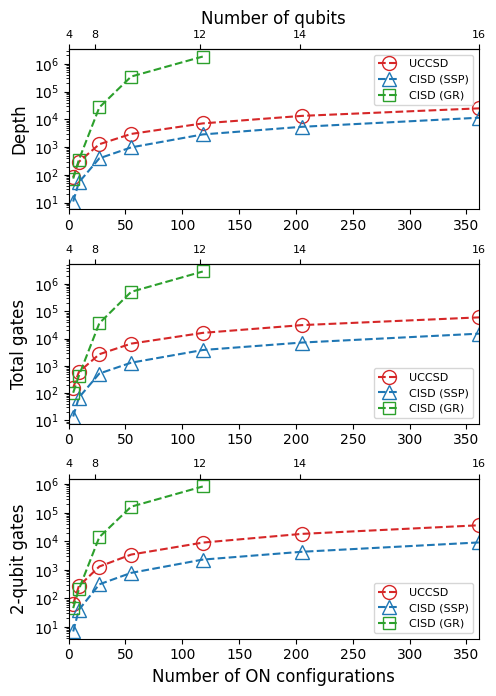

In [5]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(5,7))
font = {#'weight': 'bold',
        'size': 8}
plt.rc('font', **font)

n_qubits = [4, 6, 8, 10, 12, 14, 16]


def nconfig2nqubit(x):
    # x = n_qubits
    return np.interp(x, n_configs_vs_so, n_qubits)

def nqubit2nconfig(x):
    # x = n_configs_vs_so
    return np.interp(x, n_qubits, n_configs_vs_so)

color_ucc = 'tab:red'
color_ssp = 'tab:blue'
color_gr = 'tab:green'


axs[0].set_ylabel('Depth', size=12)
axs[0].semilogy(n_configs_vs_so, ucc_depths, color=color_ucc, linestyle="dashed", markerfacecolor="None", marker='o', markersize=10, label="UCCSD")
axs[0].semilogy(n_configs_vs_so, ssp_depths, color=color_ssp, linestyle="dashed", markerfacecolor="None", marker='^', markersize=10, label="CISD (SSP)")
axs[0].semilogy(n_configs_vs_so[0:5], gr_depths, color=color_gr, linestyle="dashed", markerfacecolor="None", marker='s', markersize=8, label="CISD (GR)")
axs[0].set_xlim(0, 361)
axs[0].legend()
secax = axs[0].secondary_xaxis('top', functions=(nconfig2nqubit, nqubit2nconfig))
secax.set_xticks([4, 8, 12, 14, 16])
secax.set_xlabel('Number of qubits', size=12)


axs[1].set_ylabel('Total gates', size=12)
axs[1].semilogy(n_configs_vs_so, ucc_ngates, color=color_ucc, linestyle="dashed", markerfacecolor="None", marker='o', markersize=10, label="UCCSD")
axs[1].semilogy(n_configs_vs_so, ssp_ngates, color=color_ssp, linestyle="dashed", markerfacecolor="None", marker='^', markersize=10, label="CISD (SSP)")
axs[1].semilogy(n_configs_vs_so[0:5], gr_ngates, color=color_gr, linestyle="dashed", markerfacecolor="None", marker='s', markersize=8, label="CISD (GR)")
axs[1].set_xlim(0, 361)
axs[1].legend()
secax = axs[1].secondary_xaxis('top', functions=(nconfig2nqubit, nqubit2nconfig))
secax.set_xticks([4, 8, 12, 14, 16])
# secax.set_xlabel('Number of qubits', size=12)

axs[2].set_ylabel('2-qubit gates', size=12)
axs[2].semilogy(n_configs_vs_so, ucc_n2qgates, color=color_ucc, linestyle="dashed", markerfacecolor="None", marker='o', markersize=10, label="UCCSD")
axs[2].semilogy(n_configs_vs_so, ssp_n2qgates, color=color_ssp, linestyle="dashed", markerfacecolor="None", marker='^', markersize=10, label="CISD (SSP)")
axs[2].semilogy(n_configs_vs_so[0:5], gr_n2qgates, color=color_gr, linestyle="dashed", markerfacecolor="None", marker='s', markersize=8, label="CISD (GR)")
axs[2].set_xlim(0, 361)
axs[2].legend()
secax = axs[2].secondary_xaxis('top', functions=(nconfig2nqubit, nqubit2nconfig))
secax.set_xticks([4, 8, 12, 14, 16])
# secax.set_xlabel('Number of qubits', size=12)
axs[2].set_xlabel('Number of ON configurations', size=12)

fig.tight_layout()
plt.show()
# plt.savefig("uccsd_cisd_ssp_gr_resources.pdf")